<a href="https://colab.research.google.com/github/chenjiang0819/AISolverForPegSolitaire-GraphSearch/blob/main/Assignment_1_Fall2022_submit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENGS 108 Fall 2022 Assignment 1
### Due September 15, 2022 at 11:59PM on Canvas
### Instructors: George Cybenko
### TAs: Chase Yakaboski and Clement Nyanhongo

## Question 1
Go to
https://www.kaggle.com/datasets/coloradokb/dandelionimages and download the dandelion and other images.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pydrive.auth import GoogleAuth 
from pydrive.drive import GoogleDrive
from google.colab import auth 
from oauth2client.client import GoogleCredentials 
 
auth.authenticate_user() 
gauth = GoogleAuth() 
gauth.credentials = GoogleCredentials.get_application_default() 
drive = GoogleDrive(gauth)

# locate the folder in my google drive
download = drive.CreateFile({'id': '1egb7hMv2vQCRCpTLe66HveVHSG8Lutmr'})

# download and unzip the files
download.GetContentFile('archive.zip') 
!unzip archive.zip

Archive:  archive.zip
replace Images/dandelion/IMG_1118.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Images/dandelion/IMG_1118.jpg  
  inflating: Images/dandelion/IMG_1119.jpg  
  inflating: Images/dandelion/IMG_1120.jpg  
  inflating: Images/dandelion/IMG_1121.jpg  
  inflating: Images/dandelion/IMG_1122.jpg  
  inflating: Images/dandelion/IMG_1123.jpg  
  inflating: Images/dandelion/IMG_1124.jpg  
  inflating: Images/dandelion/IMG_1125.jpg  
  inflating: Images/dandelion/IMG_1126.jpg  
  inflating: Images/dandelion/IMG_1127.jpg  
  inflating: Images/dandelion/IMG_1128.jpg  
  inflating: Images/dandelion/IMG_1129.jpg  
  inflating: Images/dandelion/IMG_1130.jpg  
  inflating: Images/dandelion/IMG_1131.jpg  
  inflating: Images/dandelion/IMG_1132.jpg  
  inflating: Images/dandelion/IMG_1133.jpg  
  inflating: Images/dandelion/IMG_1134.jpg  
  inflating: Images/dandelion/IMG_1135.jpg  
  inflating: Images/dandelion/IMG_1136.jpg  
  inflating: Images/dandelion/IMG_1137.jpg  

In [3]:
import os
import keras
from keras.preprocessing import image

dandelionImagesDir = './Images/dandelion'
otherImagesDir = './Images/other'

global dandelion
global others
global all

# traverse all the imges in the folder
def findAllFile(imagesDir):
    for root, ds, fs in os.walk(imagesDir):
        for f in fs:
            yield f

def getImages(imagesDir):
  imageArry = []
  for i in findAllFile(imagesDir):
    # when images are loaded, they will be resized to 500*500) 
    img = image.load_img(imagesDir +'/' + i, target_size = (500,500)) 
    oneImage = image.img_to_array(img)
    # normalize the image to minize the outliers (0 to 1)
    oneImage = oneImage/255
    # insert the images in a array
    imageArry.append(oneImage)
  return imageArry

dandelion = np.array(getImages(dandelionImagesDir))
others = np.array(getImages(otherImagesDir))
all = np.vstack((dandelion,others))

# check the iamge arrays
print("Number of dandelion images: {} " .format(len(dandelion)))
print("Number of other images: {} " .format(len(others)))
print("Number of all images: {} " .format(len(all)))
print("images 0 to 626 are others, and images 626 to 1261 are dandelion")
print("Examples of the arrays: {}" .format(all[:5]))

Number of dandelion images: 635 
Number of other images: 627 
Number of all images: 1262 
images 0 to 626 are others, and images 626 to 1261 are dandelion
Examples of the arrays: [[[[0.19607843 0.31764707 0.08235294]
   [0.3882353  0.5058824  0.2627451 ]
   [0.5176471  0.6431373  0.38039216]
   ...
   [0.5647059  0.68235296 0.3372549 ]
   [0.4862745  0.6039216  0.25882354]
   [0.5176471  0.63529414 0.2901961 ]]

  [[0.19215687 0.3137255  0.07843138]
   [0.44313726 0.56078434 0.3254902 ]
   [0.5176471  0.64705884 0.3764706 ]
   ...
   [0.5176471  0.63529414 0.2901961 ]
   [0.5254902  0.6431373  0.29803923]
   [0.46666667 0.58431375 0.23921569]]

  [[0.2        0.32156864 0.08627451]
   [0.08235294 0.19607843 0.        ]
   [0.5058824  0.63529414 0.3647059 ]
   ...
   [0.54509807 0.6627451  0.3254902 ]
   [0.50980395 0.627451   0.2901961 ]
   [0.49019608 0.60784316 0.27058825]]

  ...

  [[0.73333335 0.84705883 0.4862745 ]
   [0.10980392 0.10980392 0.01568628]
   [0.08627451 0.05882353 0

(a) Define a reasonable distance metric between images and explain it with an example.

I will abstract the features of the images and use Cosine Similarity to compare them. 

Nowadays, there are two main methods to do features abstraction. The first one is achieved by extracting image descriptors (white box algorithm). The second is achieved by a neural network-based approach (black box algorithm). Since we dont use the Machine Lerning Methods in this Assignment, I will impelemt the first method using KAZE descriptor.



In [4]:
import cv2
import scipy

result = {}

# how many key points we are looking for
vSize = 32

def showImg(data ,num):
  plt.imshow(data[num])
  plt.show()

# Feature extractor
def extractFeatures(vector_size, inputImage):
    image = inputImage 
    try:
        # using KAZE as the tool
        alg = cv2.KAZE_create()
        # find keypoints on the images
        kPoints = alg.detect(image)
        # get the keypoints and sort them based on keypoint response value
        kPoints = sorted(kPoints, key=lambda x: -x.response)[:vector_size]
        # computing descriptor vector
        kPoints, descriptor = alg.compute(image, kPoints)
        # flatten all of descriptor vector results in a big feature vector
        feature = descriptor.flatten()
        # make descriptor to same size (descriptor vector size is 64)
        needed_size = (vector_size * 64)
        if feature.size < needed_size:
            # if number of descriptor in feature(array) is less than we set. then zeros will be added
            feature = np.concatenate([feature, np.zeros(needed_size - feature.size)])
    # warn us if there is a error
    except cv2.error as e:
        print('Error: {}' .format(e))
        return None
    # otherwise return the result
    return feature

def extractorAll(size, myImage, result):
  for i in range(len(myImage)):
    print("Extracting features from the images {}%" .format(round(i/len(myImage)*100,2)))
    result[i]= extractFeatures(size, myImage[i])
  return result

# extract features for all images
extractorAll(vSize, all, result)

Extracting features from the images 0.0%
Extracting features from the images 0.08%
Extracting features from the images 0.16%
Extracting features from the images 0.24%
Extracting features from the images 0.32%
Extracting features from the images 0.4%
Extracting features from the images 0.48%
Extracting features from the images 0.55%
Extracting features from the images 0.63%
Extracting features from the images 0.71%
Extracting features from the images 0.79%
Extracting features from the images 0.87%
Extracting features from the images 0.95%
Extracting features from the images 1.03%
Extracting features from the images 1.11%
Extracting features from the images 1.19%
Extracting features from the images 1.27%
Extracting features from the images 1.35%
Extracting features from the images 1.43%
Extracting features from the images 1.51%
Extracting features from the images 1.58%
Extracting features from the images 1.66%
Extracting features from the images 1.74%
Extracting features from the images 

{0: array([ 0.00876386,  0.00141144,  0.04618052, ..., -0.01758698,
         0.07607418,  0.09794988], dtype=float32),
 1: array([ 0.0104027 , -0.00512114,  0.02779759, ..., -0.01095252,
         0.15688398,  0.07271153], dtype=float32),
 2: array([-0.02460925,  0.0062304 ,  0.08015884, ..., -0.00197676,
         0.0930933 ,  0.10379563], dtype=float32),
 3: array([-0.03556859,  0.01617384,  0.05639911, ...,  0.01221447,
         0.07330956,  0.08650572], dtype=float32),
 4: array([-0.00435494,  0.00176441,  0.11439914, ...,  0.06028389,
         0.09662364,  0.11553724], dtype=float32),
 5: array([-0.01872625, -0.00967137,  0.0316468 , ..., -0.03908047,
         0.10916365,  0.08918107], dtype=float32),
 6: array([-0.01304585, -0.05276334,  0.05448372, ..., -0.04303284,
         0.03671791,  0.10713754], dtype=float32),
 7: array([-0.03791815,  0.01015942,  0.08899605, ...,  0.00972743,
         0.04340976,  0.1132608 ], dtype=float32),
 8: array([-0.0042487 ,  0.0321839 ,  0.05508212

In [5]:
# check the results
print("The lenth of the feature dictionay {}".format(len(result)))
print("Example of abstracted features from the first image is {}" .format(extractFeatures(vSize, all[0])))

The lenth of the feature dictionay 1262
Example of abstracted features from the first image is [ 0.00876386  0.00141144  0.04618052 ... -0.01758698  0.07607418
  0.09794988]


(b) Which two images are most similar according to your metric?

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

# find the matched pictures
def similar(self):
  similarity = float("-inf")
  imageA = 0
  imageB = 0 
  for i in range(len(self)):
    print("Comparing the data {}%".format(round(i/len(self)*100, 2)))
    for j in range(len(self)):
      if cosine_similarity(self[i].reshape(1, -1) , self[j].reshape(1, -1)) > similarity and i != j:
        similarity = cosine_similarity(self[i].reshape(1, -1) , self[j].reshape(1, -1))
        imageA = i
        imageB = j  
  return imageA , imageB, similarity

A , B , S = similar(result)

Comparing the data 0.0%
Comparing the data 0.08%
Comparing the data 0.16%
Comparing the data 0.24%
Comparing the data 0.32%
Comparing the data 0.4%
Comparing the data 0.48%
Comparing the data 0.55%
Comparing the data 0.63%
Comparing the data 0.71%
Comparing the data 0.79%
Comparing the data 0.87%
Comparing the data 0.95%
Comparing the data 1.03%
Comparing the data 1.11%
Comparing the data 1.19%
Comparing the data 1.27%
Comparing the data 1.35%
Comparing the data 1.43%
Comparing the data 1.51%
Comparing the data 1.58%
Comparing the data 1.66%
Comparing the data 1.74%
Comparing the data 1.82%
Comparing the data 1.9%
Comparing the data 1.98%
Comparing the data 2.06%
Comparing the data 2.14%
Comparing the data 2.22%
Comparing the data 2.3%
Comparing the data 2.38%
Comparing the data 2.46%
Comparing the data 2.54%
Comparing the data 2.61%
Comparing the data 2.69%
Comparing the data 2.77%
Comparing the data 2.85%
Comparing the data 2.93%
Comparing the data 3.01%
Comparing the data 3.09%
Comp

Two images are most similar are :


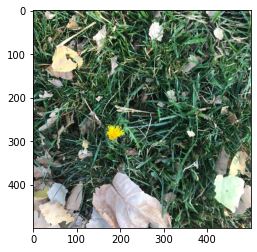

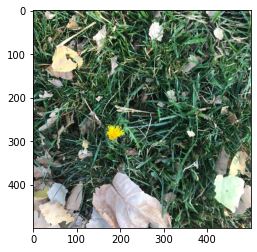

similarity of the image 296 and image 963  is [[100.00004]]%
The image IMG7529 is in both dandelion and others data set !


In [7]:
# print the result
print("Two images are most similar are :")
showImg(all,A)
showImg(all,B)
print("similarity of the image {} and image {}  is {}%".format(A,B,(S)*100))
print("The image IMG7529 is in both dandelion and others data set !")

(c) Which two images are most different according to your metric?

In [8]:
# find the matched pictures
def nonSimilar(self):
  similarity = float("inf")
  imageA = 0
  imageB = 0 
  for i in range(len(self)):
    print("Comparing the data {}%".format(round(i/len(self)*100, 2)))
    for j in range(len(self)):
      if cosine_similarity(self[i].reshape(1, -1) , self[j].reshape(1, -1)) < similarity and i != j:
        similarity = cosine_similarity(self[i].reshape(1, -1) , self[j].reshape(1, -1))
        imageA = i
        imageB = j  
  return imageA , imageB, similarity

A , B , S = nonSimilar(result)


Comparing the data 0.0%
Comparing the data 0.08%
Comparing the data 0.16%
Comparing the data 0.24%
Comparing the data 0.32%
Comparing the data 0.4%
Comparing the data 0.48%
Comparing the data 0.55%
Comparing the data 0.63%
Comparing the data 0.71%
Comparing the data 0.79%
Comparing the data 0.87%
Comparing the data 0.95%
Comparing the data 1.03%
Comparing the data 1.11%
Comparing the data 1.19%
Comparing the data 1.27%
Comparing the data 1.35%
Comparing the data 1.43%
Comparing the data 1.51%
Comparing the data 1.58%
Comparing the data 1.66%
Comparing the data 1.74%
Comparing the data 1.82%
Comparing the data 1.9%
Comparing the data 1.98%
Comparing the data 2.06%
Comparing the data 2.14%
Comparing the data 2.22%
Comparing the data 2.3%
Comparing the data 2.38%
Comparing the data 2.46%
Comparing the data 2.54%
Comparing the data 2.61%
Comparing the data 2.69%
Comparing the data 2.77%
Comparing the data 2.85%
Comparing the data 2.93%
Comparing the data 3.01%
Comparing the data 3.09%
Comp

Two images are most different are :


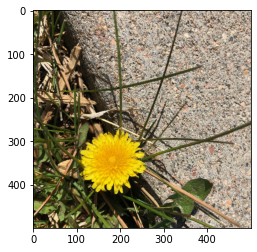

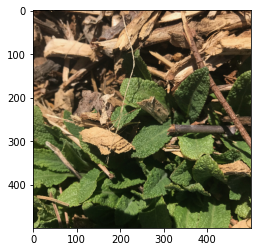

Similarity of the image 620 and image 960  is [[56.291164]]%


In [9]:
# print the result
print("Two images are most different are :")
showImg(all, A)
showImg(all, B)
print("Similarity of the image {} and image {}  is {}%".format(A,B,(S)*100))

(d) What dandelion image is the most representative of the dandelion images?

It will be the image which is the most similar to all images in dandelion data set(has most samefeatures).\
Since the biggest proportion of almost images in the data set is leaf of dandelion, the result will be the image has most leaf.


In [10]:
#Extract features
dResult = {}
extractorAll(vSize, dandelion, dResult)

Extracting features from the images 0.0%
Extracting features from the images 0.16%
Extracting features from the images 0.31%
Extracting features from the images 0.47%
Extracting features from the images 0.63%
Extracting features from the images 0.79%
Extracting features from the images 0.94%
Extracting features from the images 1.1%
Extracting features from the images 1.26%
Extracting features from the images 1.42%
Extracting features from the images 1.57%
Extracting features from the images 1.73%
Extracting features from the images 1.89%
Extracting features from the images 2.05%
Extracting features from the images 2.2%
Extracting features from the images 2.36%
Extracting features from the images 2.52%
Extracting features from the images 2.68%
Extracting features from the images 2.83%
Extracting features from the images 2.99%
Extracting features from the images 3.15%
Extracting features from the images 3.31%
Extracting features from the images 3.46%
Extracting features from the images 3

{0: array([ 0.00876386,  0.00141144,  0.04618052, ..., -0.01758698,
         0.07607418,  0.09794988], dtype=float32),
 1: array([ 0.0104027 , -0.00512114,  0.02779759, ..., -0.01095252,
         0.15688398,  0.07271153], dtype=float32),
 2: array([-0.02460925,  0.0062304 ,  0.08015884, ..., -0.00197676,
         0.0930933 ,  0.10379563], dtype=float32),
 3: array([-0.03556859,  0.01617384,  0.05639911, ...,  0.01221447,
         0.07330956,  0.08650572], dtype=float32),
 4: array([-0.00435494,  0.00176441,  0.11439914, ...,  0.06028389,
         0.09662364,  0.11553724], dtype=float32),
 5: array([-0.01872625, -0.00967137,  0.0316468 , ..., -0.03908047,
         0.10916365,  0.08918107], dtype=float32),
 6: array([-0.01304585, -0.05276334,  0.05448372, ..., -0.04303284,
         0.03671791,  0.10713754], dtype=float32),
 7: array([-0.03791815,  0.01015942,  0.08899605, ...,  0.00972743,
         0.04340976,  0.1132608 ], dtype=float32),
 8: array([-0.0042487 ,  0.0321839 ,  0.05508212

In [11]:
#Compare features
def dSimilar(self):
  similarity = float("-inf")
  imageA = 0
  for i in range(len(self)):
    temp = 0
    print("Comparing the data {}%".format(round(i/len(self)*100, 2)))
    for j in range(len(self)):
      if i != j:
        C = cosine_similarity(self[i].reshape(1, -1) , self[j].reshape(1, -1))
        temp = temp + C
    if temp > similarity:
      similarity = temp
      imageA = i
  return imageA , similarity

A , S = dSimilar(dResult)


Comparing the data 0.0%
Comparing the data 0.16%
Comparing the data 0.31%
Comparing the data 0.47%
Comparing the data 0.63%
Comparing the data 0.79%
Comparing the data 0.94%
Comparing the data 1.1%
Comparing the data 1.26%
Comparing the data 1.42%
Comparing the data 1.57%
Comparing the data 1.73%
Comparing the data 1.89%
Comparing the data 2.05%
Comparing the data 2.2%
Comparing the data 2.36%
Comparing the data 2.52%
Comparing the data 2.68%
Comparing the data 2.83%
Comparing the data 2.99%
Comparing the data 3.15%
Comparing the data 3.31%
Comparing the data 3.46%
Comparing the data 3.62%
Comparing the data 3.78%
Comparing the data 3.94%
Comparing the data 4.09%
Comparing the data 4.25%
Comparing the data 4.41%
Comparing the data 4.57%
Comparing the data 4.72%
Comparing the data 4.88%
Comparing the data 5.04%
Comparing the data 5.2%
Comparing the data 5.35%
Comparing the data 5.51%
Comparing the data 5.67%
Comparing the data 5.83%
Comparing the data 5.98%
Comparing the data 6.14%
Comp

The most representative of the dandelion images is:


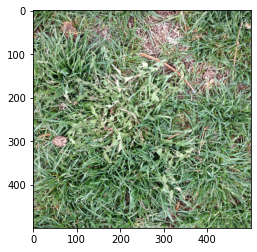

Similarity of the image 563 is [[86.22496]]%
It makes sense, since the biggest proportion of almost images in the data set is leaf of dandelion


In [12]:
# print the result
print("The most representative of the dandelion images is:")
showImg(dandelion, A)
print("Similarity of the image {} is {}%".format(A, S/len(dResult)*100))
print("It makes sense, since the biggest proportion of almost images in the data set is leaf of dandelion")

(e) Which other image is most representative of the other images?

It will be the image which is the most similar to all images in others data set (has most features)

In [13]:
#Extract features
oResult = {}
extractorAll(vSize, dandelion, oResult)

Extracting features from the images 0.0%
Extracting features from the images 0.16%
Extracting features from the images 0.31%
Extracting features from the images 0.47%
Extracting features from the images 0.63%
Extracting features from the images 0.79%
Extracting features from the images 0.94%
Extracting features from the images 1.1%
Extracting features from the images 1.26%
Extracting features from the images 1.42%
Extracting features from the images 1.57%
Extracting features from the images 1.73%
Extracting features from the images 1.89%
Extracting features from the images 2.05%
Extracting features from the images 2.2%
Extracting features from the images 2.36%
Extracting features from the images 2.52%
Extracting features from the images 2.68%
Extracting features from the images 2.83%
Extracting features from the images 2.99%
Extracting features from the images 3.15%
Extracting features from the images 3.31%
Extracting features from the images 3.46%
Extracting features from the images 3

{0: array([ 0.00876386,  0.00141144,  0.04618052, ..., -0.01758698,
         0.07607418,  0.09794988], dtype=float32),
 1: array([ 0.0104027 , -0.00512114,  0.02779759, ..., -0.01095252,
         0.15688398,  0.07271153], dtype=float32),
 2: array([-0.02460925,  0.0062304 ,  0.08015884, ..., -0.00197676,
         0.0930933 ,  0.10379563], dtype=float32),
 3: array([-0.03556859,  0.01617384,  0.05639911, ...,  0.01221447,
         0.07330956,  0.08650572], dtype=float32),
 4: array([-0.00435494,  0.00176441,  0.11439914, ...,  0.06028389,
         0.09662364,  0.11553724], dtype=float32),
 5: array([-0.01872625, -0.00967137,  0.0316468 , ..., -0.03908047,
         0.10916365,  0.08918107], dtype=float32),
 6: array([-0.01304585, -0.05276334,  0.05448372, ..., -0.04303284,
         0.03671791,  0.10713754], dtype=float32),
 7: array([-0.03791815,  0.01015942,  0.08899605, ...,  0.00972743,
         0.04340976,  0.1132608 ], dtype=float32),
 8: array([-0.0042487 ,  0.0321839 ,  0.05508212

In [14]:
#Comapre features
def oSimilar(self):
  similarity = float("-inf")
  imageB = 0 
  for i in range(len(self)):
    temp = 0
    print("Comparing the data {}%".format(round(i/len(self)*100, 2)))
    for j in range(len(self)):
      if i != j:
        C = cosine_similarity(self[i].reshape(1, -1) , self[j].reshape(1, -1))
        temp = temp + C
    if temp > similarity:
      similarity = temp
      imageB = i
  return imageB , similarity

B , S = oSimilar(oResult)

Comparing the data 0.0%
Comparing the data 0.16%
Comparing the data 0.31%
Comparing the data 0.47%
Comparing the data 0.63%
Comparing the data 0.79%
Comparing the data 0.94%
Comparing the data 1.1%
Comparing the data 1.26%
Comparing the data 1.42%
Comparing the data 1.57%
Comparing the data 1.73%
Comparing the data 1.89%
Comparing the data 2.05%
Comparing the data 2.2%
Comparing the data 2.36%
Comparing the data 2.52%
Comparing the data 2.68%
Comparing the data 2.83%
Comparing the data 2.99%
Comparing the data 3.15%
Comparing the data 3.31%
Comparing the data 3.46%
Comparing the data 3.62%
Comparing the data 3.78%
Comparing the data 3.94%
Comparing the data 4.09%
Comparing the data 4.25%
Comparing the data 4.41%
Comparing the data 4.57%
Comparing the data 4.72%
Comparing the data 4.88%
Comparing the data 5.04%
Comparing the data 5.2%
Comparing the data 5.35%
Comparing the data 5.51%
Comparing the data 5.67%
Comparing the data 5.83%
Comparing the data 5.98%
Comparing the data 6.14%
Comp

The most representative of the other images is:


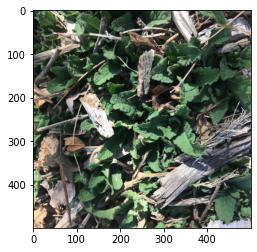

Similarity of the image 563 is [[86.22496]]%


In [15]:
# print the result
print("The most representative of the other images is:")
showImg(others,B)
print("Similarity of the image {} is {}%".format(B,S/len(dResult)*100))

(f) What dandelion image and other image are closest to each other?

In [16]:
# find the matched pictures
def twoSimilar(self, other):
  similarity = float("inf")
  imageA = 0
  imageB = 0 
  for i in range(len(other)):
    print("Comparing the data {}%".format(round(i/len(self)*100, 2)))
    for j in range(len(self)):
      if cosine_similarity(self[i].reshape(1, -1) , self[j].reshape(1, -1)) < similarity and i != j:
        similarity = cosine_similarity(self[i].reshape(1, -1) , self[j].reshape(1, -1))
        imageA = i
        imageB = j  
  return imageA , imageB, similarity

A , B , S = twoSimilar(dResult, oResult)


Comparing the data 0.0%
Comparing the data 0.16%
Comparing the data 0.31%
Comparing the data 0.47%
Comparing the data 0.63%
Comparing the data 0.79%
Comparing the data 0.94%
Comparing the data 1.1%
Comparing the data 1.26%
Comparing the data 1.42%
Comparing the data 1.57%
Comparing the data 1.73%
Comparing the data 1.89%
Comparing the data 2.05%
Comparing the data 2.2%
Comparing the data 2.36%
Comparing the data 2.52%
Comparing the data 2.68%
Comparing the data 2.83%
Comparing the data 2.99%
Comparing the data 3.15%
Comparing the data 3.31%
Comparing the data 3.46%
Comparing the data 3.62%
Comparing the data 3.78%
Comparing the data 3.94%
Comparing the data 4.09%
Comparing the data 4.25%
Comparing the data 4.41%
Comparing the data 4.57%
Comparing the data 4.72%
Comparing the data 4.88%
Comparing the data 5.04%
Comparing the data 5.2%
Comparing the data 5.35%
Comparing the data 5.51%
Comparing the data 5.67%
Comparing the data 5.83%
Comparing the data 5.98%
Comparing the data 6.14%
Comp

The dandelion image and other image, which are cloest to each other, are:


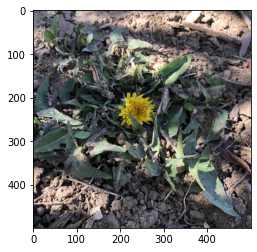

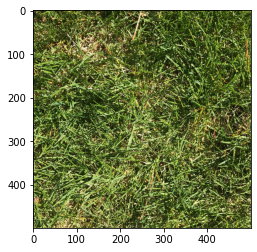

Similarity of the image 274 and image 620  is [[59.209763]]%


In [17]:
# print the result
print("The dandelion image and other image, which are cloest to each other, are:")
showImg(dandelion, A)
showImg(others,B)
print("Similarity of the image {} and image {}  is {}%".format(A,B,(S)*100))

## Question 2
Let 
$$ f(x_1, x_2, x_3, x_4, x_5) = \frac{1}{1 + e^{-2x_1-3x_2-4x_3-5x_4-6x_5}} $$

(a) What is $$\frac{∂f}{∂x_i}$$

$$\frac{∂(f)}{∂(x_i)} = [\frac{∂(f)}{∂(x_1)}, \frac{∂(f)}{∂(x_2)}, \frac{∂(f)}{∂(x_3)}, \frac{∂(f)}{∂(x_4)}, \frac{∂(f)}{∂(x_5)}];$$
$$ = [\frac{2e^{-2x_1+C}}{\left(1+e^{-2x_1+C}\right)^2}, \frac{3e^{-3x_2+C}}{\left(1+e^{-3x_2+C}\right)^2}, \frac{4e^{-4x_3+C}}{\left(1+e^{-4x_3+C}\right)^2}, \frac{5e^{-5x_4+C}}{\left(1+e^{-5x_4+C}\right)^2}, \frac{6e^{-6x_5+C}}{\left(1+e^{-6x_5+C}\right)^2}];$$
C = Constant;
$$ = [\frac{2e^{-2x_1-3x_2-4x_3-5x_4-6x_5}}{\left(1+e^{-2x_1-3x_2-4x_3-5x_4-6x_5}\right)^2}, \frac{3e^{-3x_2-2x_1-4x_3-5x_4-6x_5}}{\left(1+e^{-3x_2-2x_1-4x_3-5x_4-6x_5}\right)^2}, \frac{4e^{-4x_3-2x_1-3x_2-5x_4-6x_5}}{\left(1+e^{-4x_3-2x_1-3x_2-5x_4-6x_5}\right)^2}, \frac{5e^{-5x_4-2x_1-3x_2-4x_3-6x_5}}{\left(1+e^{-5x_4-2x_1-3x_2-4x_3-6x_5}\right)^2}, \frac{6e^{-6x_5-2x_1-3x_2-4x_3-5x_4}}{\left(1+e^{-6x_5-2x_1-3x_2-4x_3-5x_4}\right)^2}]$$

(b) What is $$\nabla f(1,0,0,0,0)\cdot ones(5,1) $$

$$ =  \frac{2e^{-2}}{\left(1+e^{-2}\right)^2}+\frac{3e^{-2}}{\left(1+e^{-2}\right)^2}+\frac{4e^{-2}}{\left(1+e^{-2}\right)^2}+\frac{5e^{-2}}{\left(1+e^{-2}\right)^2}+\frac{6e^{-2}}{\left(1+e^{-2}\right)^2}$$
$$ = \frac{20e^{-2}}{\left(1+e^{-2}\right)^2}$$
$$= \frac{20 e^2}{\left(e^2+1\right)^2}$$

(b) What is $$\nabla f(0,1,0,0,0)\cdot ones(5,1) $$

$$ =  \frac{2e^{-3}}{\left(1+e^{-3}\right)^2}+\frac{3e^{-3}}{\left(1+e^{-3}\right)^2}+\frac{4e^{-3}}{\left(1+e^{-3}\right)^2}+\frac{5e^{-3}}{\left(1+e^{-3}\right)^2}+\frac{6e^{-3}}{\left(1+e^{-3}\right)^2} $$
$$ = \frac{20e^{-3}}{\left(1+e^{-3}\right)^2}$$
$$ = \frac{20e^3}{\left(e^3+1\right)^2}$$

## Question 3
Some Tesla batteries have an amp hour rating of 230 but in tests, it has been determined that the actual amp hours of a new battery is a random variable uniformly distributed between 230 and 250 amp hours. (Tesla is conservative in reporting this.)

(a) Tesla service center is shipped 5 randomly selected batteries. What is the probability that exactly 2 of the 5 batteries have less than 235 amp hours?

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
$$ {5 \choose 2}.(\frac{235-230}{250-230})^{2}.(1 - \frac{235-230}{250-230})^{3}  $$
$$ = 10(\frac{1}{16}.\frac{27}{64}) $$
$$ = 10(\frac{27}{1024}) $$
$$ = \frac{270}{1024} $$
$$ = \frac{135}{512}$$
$$ ≈ 26.37\% $$

(b) Your Tesla battery is being replaced at that service center. The service center does not measure the amp hours of batteries it receives or installs. What is the probability that the smallest amp hours of the 5 batteries is below 235?

It is an independent probability question. 

$$ \frac{235\:-\:230}{250-230} $$
$$ =\frac{1}{4} $$

(c) What is the probability that your Tesla gets the battery with the lowest amp hours?

 It is an independent probability question. 

$$\frac{1}{250-230}$$
$$ = \frac{1}{20}$$
